In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#To display plots inline in Jupyter Notebooks
%matplotlib inline

# If the notebook is in notebooks/ and the file is in data/processed/
catalog_path = "../data/processed/streaming_catalog_enriched.csv"

catalog = pd.read_csv(catalog_path)

print(catalog.shape)
catalog.head()


(2000, 21)


,title_id,title_name,genre,release_year,origin_country,original_language,duration_min,age_rating,imdb_rating,provider,...,date_added,total_views,unique_viewers,avg_watch_duration,completion_rate,rewatch_rate,popularity_score,engagement_score,recency_years,maturity
0,1,Title 1,Comedy,1981,DE,German,97,PG,7.6,Netflux,...,2022-08-03,30,30,99.033333,0.500000,0.266667,94.333333,2.287629,44,PG
1,2,Title 2,Romance,1985,JP,Japanese,48,G,6.8,Netflux,...,2017-06-14,22,22,92.954545,0.409091,0.318182,83.563636,3.072917,40,G
2,3,Title 3,Thriller,2012,JP,English,90,NC-17,6.7,Streamio,...,2017-06-21,19,19,93.736842,0.473684,0.157895,76.478947,2.146784,13,NC-17
3,4,Title 4,Horror,2017,DE,English,80,R,6.7,CinemaNow,...,2018-02-12,19,19,106.210526,0.421053,0.105263,71.215789,2.275000,8,R
4,5,Title 5,Action,1993,ES,Italian,63,R,8.9,Netflux,...,2019-01-10,25,25,94.760000,0.560000,0.280000,101.500000,2.904127,32,R


In [3]:
# Data types of each column
catalog.dtypes
# Basic statistics for numerical columns
catalog.describe()


,title_id,release_year,duration_min,imdb_rating,is_original,total_views,unique_viewers,avg_watch_duration,completion_rate,rewatch_rate,popularity_score,engagement_score,recency_years
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2002.399000,111.304500,7.032400,0.291500,25.000000,24.947000,92.374544,0.502555,0.199070,85.232651,2.179498,22.601000
std,577.494589,13.129547,39.969958,1.188809,0.454567,5.046854,5.031883,10.312084,0.101761,0.081442,9.259786,0.501150,13.129547
min,1.000000,1980.000000,40.000000,3.100000,0.000000,8.000000,8.000000,49.952381,0.187500,0.000000,55.850000,1.075611,0.000000
25%,500.750000,1991.000000,77.000000,6.200000,0.000000,21.000000,21.000000,85.479565,0.434783,0.142857,79.013839,1.825414,12.000000
50%,1000.500000,2002.000000,112.000000,7.000000,0.000000,25.000000,25.000000,92.719212,0.500000,0.193548,85.514263,2.072541,23.000000
75%,1500.250000,2013.000000,146.000000,7.800000,1.000000,28.000000,28.000000,99.297619,0.566892,0.250000,91.778523,2.463069,34.000000
max,2000.000000,2025.000000,180.000000,9.900000,1.000000,42.000000,42.000000,137.454545,0.875000,0.600000,120.150000,4.472917,45.000000


In [4]:
# Sum total views by genre
genre_views = (
    catalog.groupby("genre")["total_views"]
    .sum()
    .sort_values(ascending=False)
)

# Plotly wants a DataFrame
df_genre_views = genre_views.reset_index()
df_genre_views.columns = ["genre", "total_views"]

fig = px.bar(
    df_genre_views,
    x="genre",
    y="total_views",
    title="Total Views by Genre",
    text="total_views",
)

fig.update_traces(texttemplate="%{text:.3s}", textposition="outside")
fig.update_layout(
    template="plotly_white",
    xaxis_title="Genre",
    yaxis_title="Total Views",
    xaxis_tickangle=-35,
    margin=dict(t=70, l=40, r=20, b=80),
)
fig.show()


 Takeaway: Views are concentrated in a few genres; the long tail suggests genre-specific targeting opportunities.



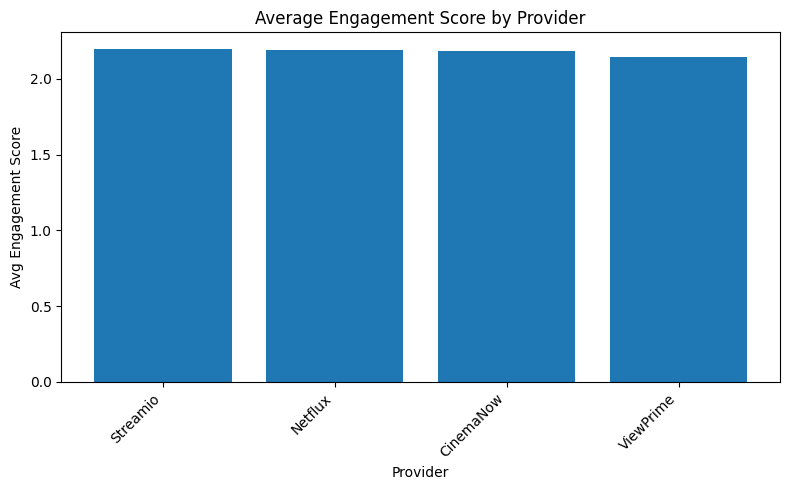

In [5]:
# Average engagement score by provider
provider_engagement = (
    catalog.groupby("provider")["engagement_score"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
plt.bar(provider_engagement.index, provider_engagement.values)
plt.xticks(rotation=45, ha="right")
plt.title("Average Engagement Score by Provider")
plt.xlabel("Provider")
plt.ylabel("Avg Engagement Score")
plt.tight_layout()
plt.show()


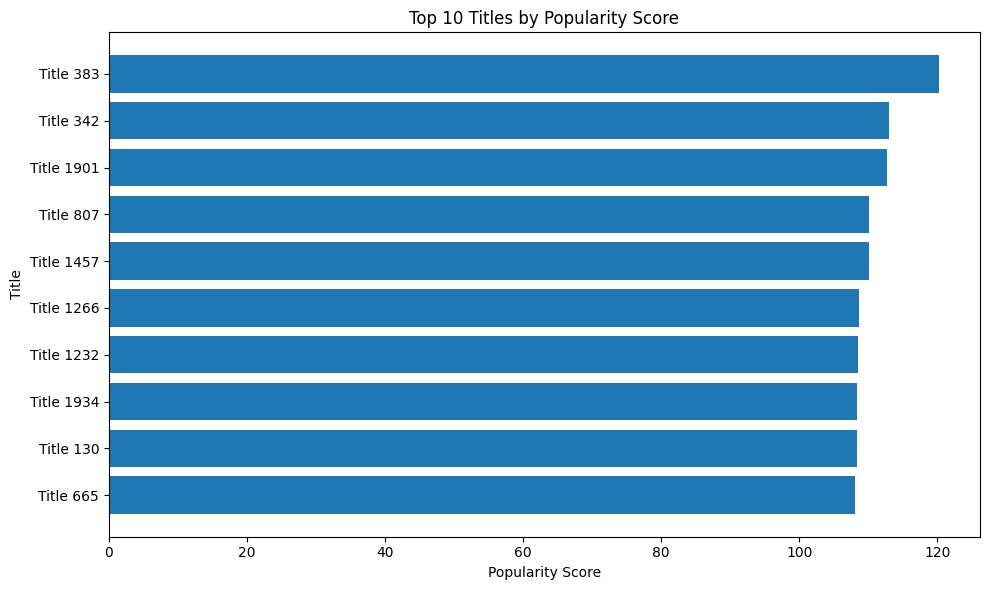

In [6]:
# Top 10 titles by popularity score
top10_popularity = (
    catalog[["title_name", "popularity_score"]]
    .sort_values("popularity_score", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
plt.barh(top10_popularity["title_name"], top10_popularity["popularity_score"])
plt.gca().invert_yaxis()  # titolo più popolare in alto
plt.title("Top 10 Titles by Popularity Score")
plt.xlabel("Popularity Score")
plt.ylabel("Title")
plt.tight_layout()
plt.show()


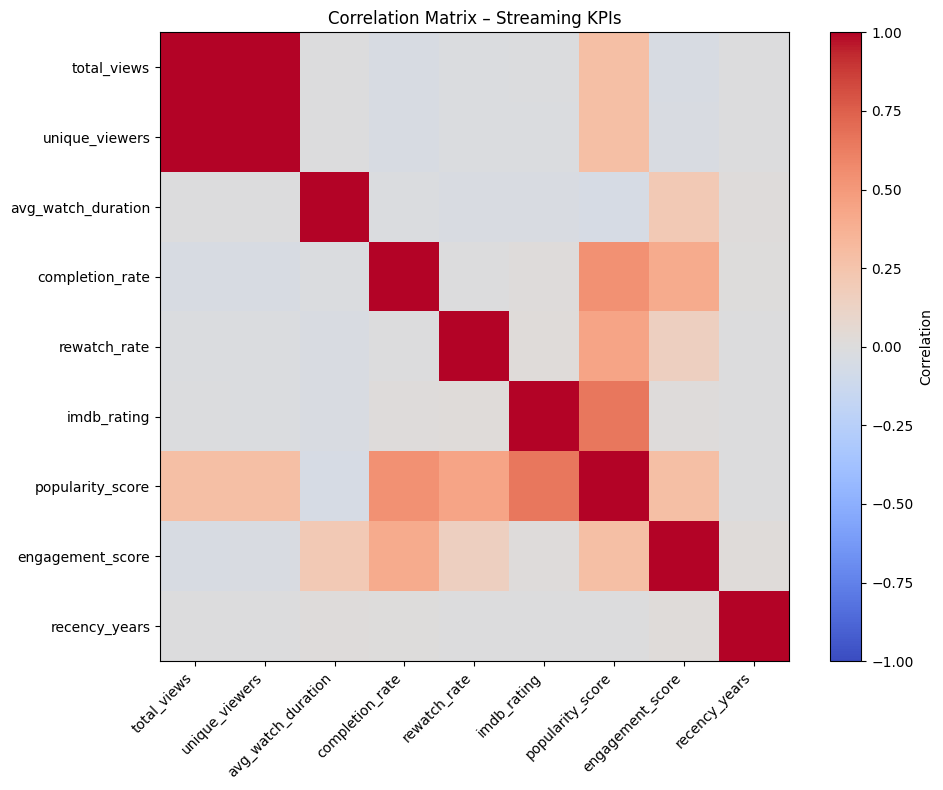

In [7]:
# Correlation matrix of numerical KPIs
num_cols = [
    "total_views",
    "unique_viewers",
    "avg_watch_duration",
    "completion_rate",
    "rewatch_rate",
    "imdb_rating",
    "popularity_score",
    "engagement_score",
    "recency_years",
]

corr = catalog[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix – Streaming KPIs")
plt.tight_layout()
plt.show()


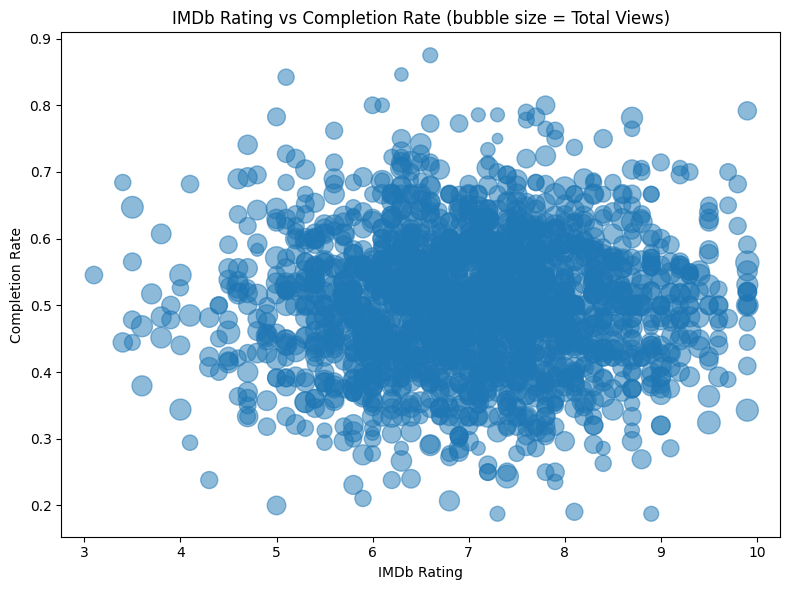

In [8]:
# Scatter plot: IMDb Rating vs Completion Rate with bubble size = Total Views
plt.figure(figsize=(8, 6))

sizes = catalog["total_views"] / catalog["total_views"].max() * 300  # scaled bubbles

plt.scatter(
    catalog["imdb_rating"],
    catalog["completion_rate"],
    s=sizes,
    alpha=0.5,
)

plt.title("IMDb Rating vs Completion Rate (bubble size = Total Views)")
plt.xlabel("IMDb Rating")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()


In [10]:
# High-level insights
def print_insights(df):
    print("=== HIGH-LEVEL INSIGHTS ===\n")
    
    # Best performing genre
    genre_views = df.groupby("genre")["total_views"].sum().sort_values(ascending=False)
    best_genre = genre_views.index[0]
    
    # Provider with highest average engagement
    provider_eng = df.groupby("provider")["engagement_score"].mean().sort_values(ascending=False)
    best_provider = provider_eng.index[0]
    best_provider_score = provider_eng.iloc[0]
    
    # Top title by popularity_score
    top_title = df.sort_values("popularity_score", ascending=False).iloc[0]
    
    # Title with highest IMDb rating (among those with enough views)
    min_views_threshold = df["total_views"].median()
    high_view_titles = df[df["total_views"] >= min_views_threshold]
    top_imdb = high_view_titles.sort_values("imdb_rating", ascending=False).iloc[0]
    
    print(f"- Genre with highest total views: **{best_genre}**")
    print(f"- Provider with highest engagement: **{best_provider}** (avg score: {best_provider_score:.2f})")
    print(f"- Most overall popular title: **{top_title['title_name']}** (popularity_score = {top_title['popularity_score']:.2f})")
    print(f"- Highest-rated title with solid view volume: **{top_imdb['title_name']}** (IMDb = {top_imdb['imdb_rating']:.1f}, total_views = {int(top_imdb['total_views'])})")
    
    # Maturity / age rating
    maturity_views = df.groupby("maturity")["total_views"].sum().sort_values(ascending=False)
    best_maturity = maturity_views.index[0]
    print(f"- Age rating with most consumption: **{best_maturity}**")
    
print_insights(catalog)


=== HIGH-LEVEL INSIGHTS ===

- Genre with highest total views: **Action**
- Provider with highest engagement: **Streamio** (avg score: 2.20)
- Most overall popular title: **Title 383** (popularity_score = 120.15)
- Highest-rated title with solid view volume: **Title 2000** (IMDb = 9.9, total_views = 35)
- Age rating with most consumption: **R**


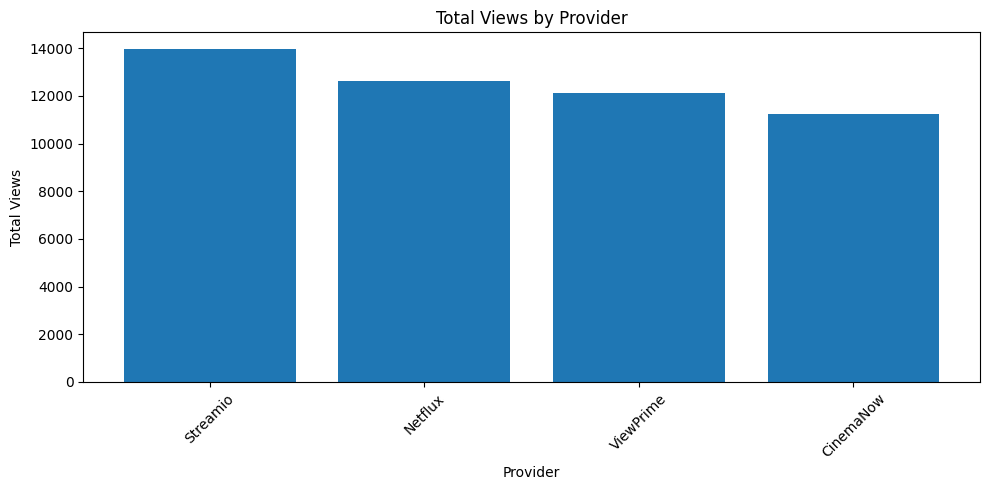

In [11]:
# Total views by provider
device_views = (
    catalog.groupby("provider")["total_views"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(device_views.index, device_views.values, color="#1F77B4")
plt.title("Total Views by Provider")
plt.xlabel("Provider")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


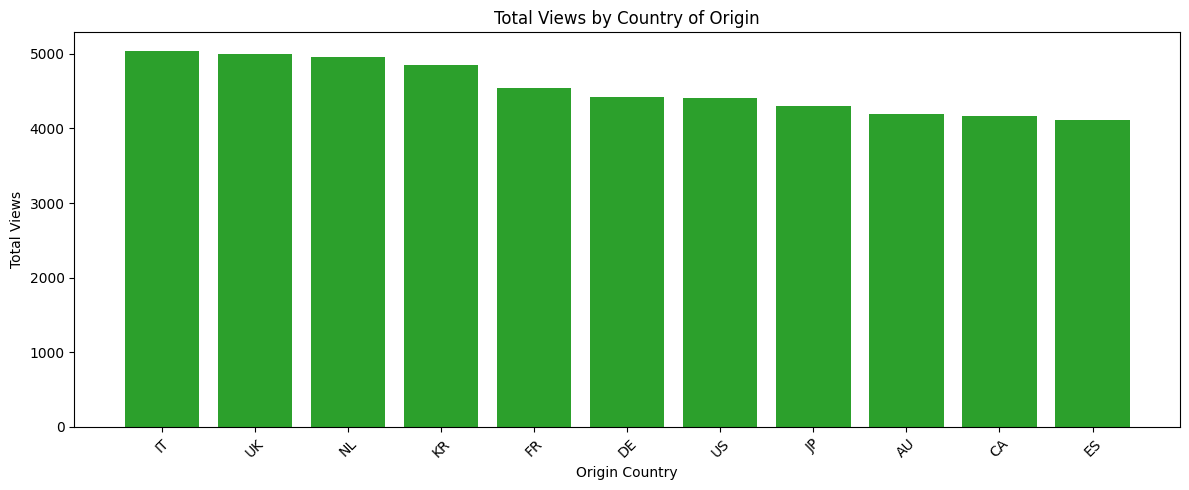

In [12]:
# Total views by country of origin
country_views = (
    catalog.groupby("origin_country")["total_views"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,5))
plt.bar(country_views.index, country_views.values, color="#2CA02C")
plt.title("Total Views by Country of Origin")
plt.xlabel("Origin Country")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


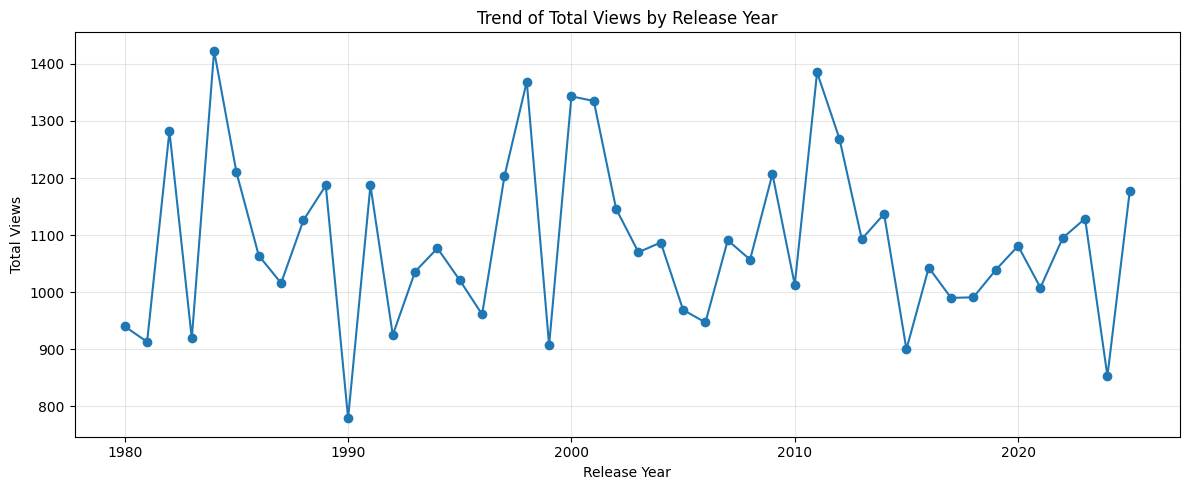

In [13]:
# Trend of total views by release year
year_views = (
    catalog.groupby("release_year")["total_views"]
    .sum()
)

plt.figure(figsize=(12,5))
plt.plot(year_views.index, year_views.values, marker="o")
plt.title("Trend of Total Views by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Views")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


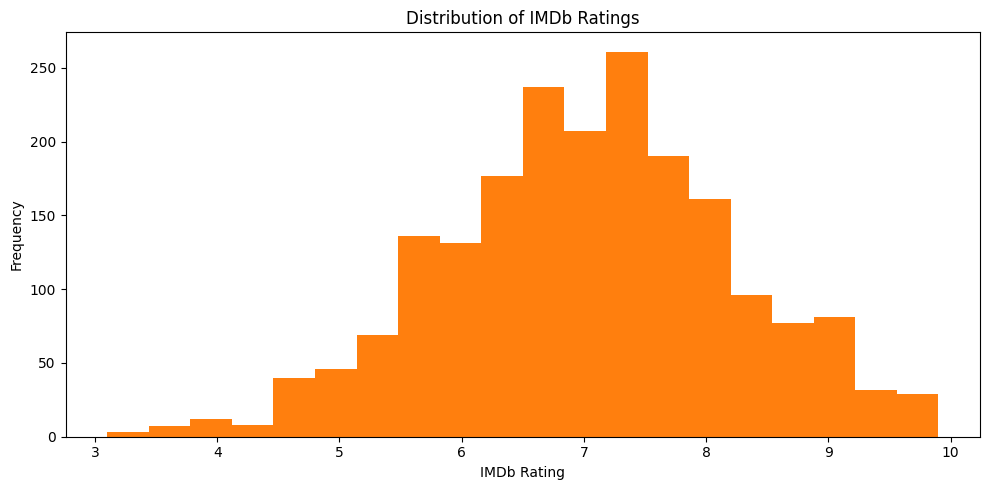

In [14]:
# Distribution of IMDb ratings
plt.figure(figsize=(10,5))
plt.hist(catalog["imdb_rating"], bins=20, color="#FF7F0E")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


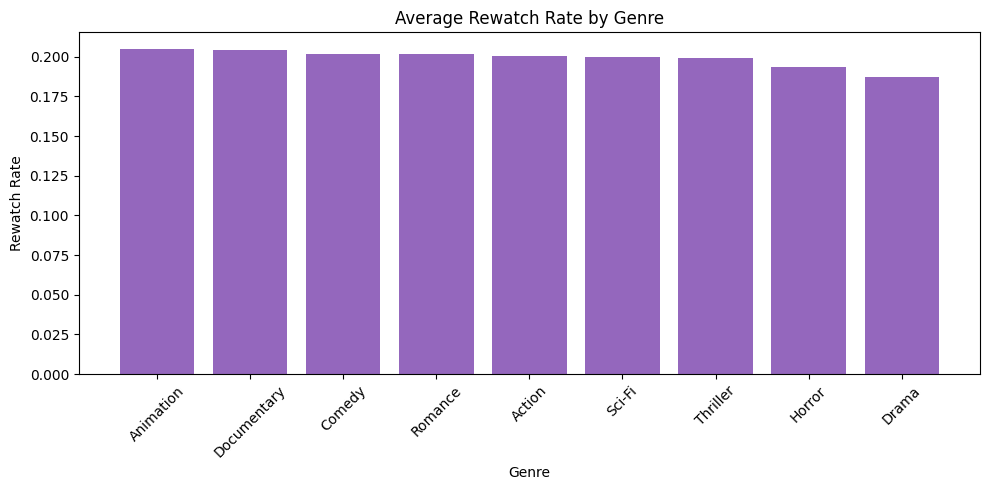

In [15]:
# Average rewatch rate by genre
genre_rewatch = (
    catalog.groupby("genre")["rewatch_rate"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(genre_rewatch.index, genre_rewatch.values, color="#9467BD")
plt.title("Average Rewatch Rate by Genre")
plt.xlabel("Genre")
plt.ylabel("Rewatch Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


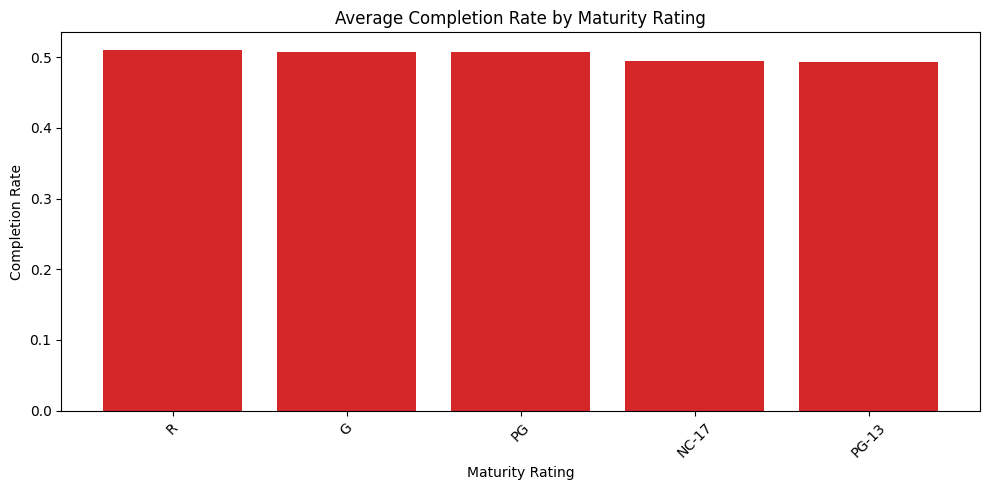

In [16]:
# Average completion rate by maturity rating
maturity_completion = (
    catalog.groupby("maturity")["completion_rate"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(maturity_completion.index, maturity_completion.values, color="#D62728")
plt.title("Average Completion Rate by Maturity Rating")
plt.xlabel("Maturity Rating")
plt.ylabel("Completion Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


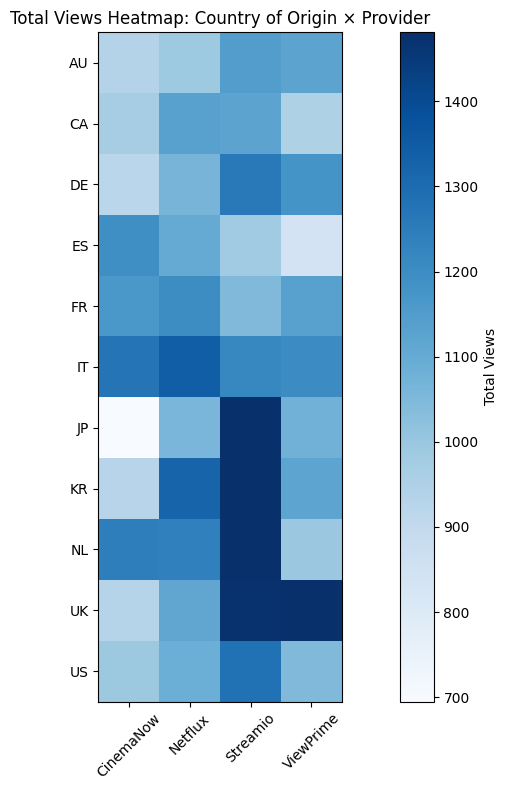

In [17]:
# Total views heatmap: Country of Origin × Provider
provider_country = (
    catalog.pivot_table(
        index="origin_country",
        columns="provider",
        values="total_views",
        aggfunc="sum"
    )
)

plt.figure(figsize=(12,8))
plt.imshow(provider_country, cmap="Blues")
plt.title("Total Views Heatmap: Country of Origin × Provider")
plt.xticks(range(len(provider_country.columns)), provider_country.columns, rotation=45)
plt.yticks(range(len(provider_country.index)), provider_country.index)
plt.colorbar(label="Total Views")
plt.tight_layout()
plt.show()
